## Página 727 . Burden Faires 9na edición

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
L = 1
T = 0.5  #tiempo max
dx = h = 0.1
dt = k = 0.01
alfa = 1

In [18]:
r = round(alfa*k/h**2,4); r

1.0

In [19]:
# valores frontera
m = round(L/dx) + 1
n = round(T/dt) + 1
print(m,n)

11 51


In [20]:
x = np.linspace(0,L,m); x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [21]:
sol = np.zeros((n,m))  #matriz con las soluciones aproximadas
w = np.zeros(m)  #reserva para el valor inicial
for i in range(m):
    w[i] = round(np.sin(np.pi*x[i]),8)
sol[0] = w.copy()
sol[0]

array([0.        , 0.30901699, 0.58778525, 0.80901699, 0.95105652,
       1.        , 0.95105652, 0.80901699, 0.58778525, 0.30901699,
       0.        ])

In [22]:
for j in range(n-1):
    u = sol[j].copy()
    w = u.copy()
    for i in range(1,m-1):
        u[i] = r*w[i-1] + (1-2*r)*w[i] + r*w[i+1]
    sol[j+1] = u.copy()
u

array([ 0.00000000e+00, -1.19403427e+14,  2.27118806e+14, -3.12602202e+14,
        3.67485913e+14, -3.86397550e+14,  3.67485913e+14, -3.12602202e+14,
        2.27118806e+14, -1.19403427e+14,  0.00000000e+00])

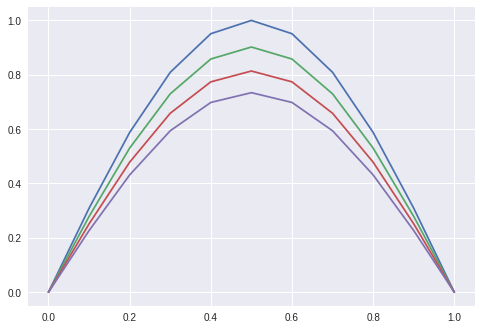

In [23]:
plt.plot(x,sol[0])
plt.plot(x,sol[1])
plt.plot(x,sol[2])
plt.plot(x,sol[3])

In [24]:
def tridiag(a,b,c,N):
    A = np.zeros([N,N])
    np.fill_diagonal(A[1:,:-1],a)
    np.fill_diagonal(A[:-1,1:],c)
    np.fill_diagonal(A,b)
    return A

A = tridiag(-r,1+2*r,-r,m-2)
A

array([[ 3., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  3., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  3., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  3., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  3., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  3., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  3., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  3., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  3.]])

In [25]:
%%time
for j in range(n-1):
    u = sol[j].copy()
    w = np.linalg.solve(A,u[1:-1])
    sol[j+1][1:-1] = w.copy()
print(sol[n-1])

[0.         0.00289802 0.00551236 0.00758711 0.00891918 0.00937818
 0.00891918 0.00758711 0.00551236 0.00289802 0.        ]
CPU times: user 1 ms, sys: 3 ms, total: 4 ms
Wall time: 4.09 ms


In [0]:
from matplotlib import rc
rc('animation', html='jshtml')

In [0]:
from matplotlib import animation

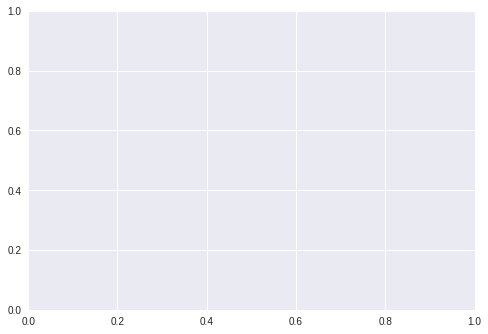

In [28]:
fig, ax = plt.subplots()
def animate(i):
    #ax.cla()
    ax.plot(x,sol[i])

In [0]:
anim = animation.FuncAnimation(fig,animate,n,interval=20,repeat=True)

In [30]:
anim

In [0]:
from IPython.display import HTML

In [0]:
%%time
HTML(anim.to_html5_video())

Wall time: 2.9 s


### Método Alternativo, usando matrices

In [0]:
sol[0]

array([0.        , 0.30901699, 0.58778525, 0.80901699, 0.95105652,
       1.        , 0.95105652, 0.80901699, 0.58778525, 0.30901699,
       0.        ])

Una forma es multiplicar $A^{-1} \cdot w^{j-1} $ para obtener $w^{j}$

In [0]:
np.dot(np.linalg.inv(A) ,sol[0][1:-1])

array([0.28146522, 0.53537866, 0.7368855 , 0.86626087, 0.91084058,
       0.86626087, 0.7368855 , 0.53537866, 0.28146522])

In [0]:
np.linalg.matrix_power(np.linalg.inv(A),n-1)

array([[0.00017911, 0.00034069, 0.00046892, 0.00055124, 0.0005796 ,
        0.00055123, 0.0004689 , 0.00034067, 0.0001791 ],
       [0.00034069, 0.00064803, 0.00089193, 0.00104852, 0.00110247,
        0.0010485 , 0.0008919 , 0.000648  , 0.00034067],
       [0.00046892, 0.00089193, 0.00122764, 0.00144316, 0.00151742,
        0.00144314, 0.0012276 , 0.0008919 , 0.0004689 ],
       [0.00055124, 0.00104852, 0.00144316, 0.00169654, 0.00178384,
        0.00169652, 0.00144314, 0.0010485 , 0.00055123],
       [0.0005796 , 0.00110247, 0.00151742, 0.00178384, 0.00187564,
        0.00178384, 0.00151742, 0.00110247, 0.0005796 ],
       [0.00055123, 0.0010485 , 0.00144314, 0.00169652, 0.00178384,
        0.00169654, 0.00144316, 0.00104852, 0.00055124],
       [0.0004689 , 0.0008919 , 0.0012276 , 0.00144314, 0.00151742,
        0.00144316, 0.00122764, 0.00089193, 0.00046892],
       [0.00034067, 0.000648  , 0.0008919 , 0.0010485 , 0.00110247,
        0.00104852, 0.00089193, 0.00064803, 0.00034069],


In [0]:
print( np.array_str(np.linalg.matrix_power(np.linalg.inv(A),n-1), precision=4, suppress_small=True))

[[0.0002 0.0003 0.0005 0.0006 0.0006 0.0006 0.0005 0.0003 0.0002]
 [0.0003 0.0006 0.0009 0.001  0.0011 0.001  0.0009 0.0006 0.0003]
 [0.0005 0.0009 0.0012 0.0014 0.0015 0.0014 0.0012 0.0009 0.0005]
 [0.0006 0.001  0.0014 0.0017 0.0018 0.0017 0.0014 0.001  0.0006]
 [0.0006 0.0011 0.0015 0.0018 0.0019 0.0018 0.0015 0.0011 0.0006]
 [0.0006 0.001  0.0014 0.0017 0.0018 0.0017 0.0014 0.001  0.0006]
 [0.0005 0.0009 0.0012 0.0014 0.0015 0.0014 0.0012 0.0009 0.0005]
 [0.0003 0.0006 0.0009 0.001  0.0011 0.001  0.0009 0.0006 0.0003]
 [0.0002 0.0003 0.0005 0.0006 0.0006 0.0006 0.0005 0.0003 0.0002]]


### Test $A^{-n} w^0 = w^n$
Otra forma es operar solo los puntos interiores

In [0]:
%%time
np.dot(np.linalg.matrix_power(np.linalg.inv(A),n-1) ,sol[0][1:-1])

Wall time: 982 µs


array([0.00289802, 0.00551236, 0.00758711, 0.00891918, 0.00937818,
       0.00891918, 0.00758711, 0.00551236, 0.00289802])

In [0]:
sol[n-1]

array([0.        , 0.00289802, 0.00551236, 0.00758711, 0.00891918,
       0.00937818, 0.00891918, 0.00758711, 0.00551236, 0.00289802,
       0.        ])